<a href="https://colab.research.google.com/github/MuhammadAfif120/BKDS01---Muhammad-Afif-Naufal-Ardani---Pertemuan-2-Hungarian.data-/blob/main/BKDS01_Muhammad_Afif_Naufal_Ardani_Pertemuan_2(Hungarian_data)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT BIMBINGAN KARIR DATA SCIENCE HUNGARIAN**





> Nama  : Muhammad Afif Naufal Ardani

> NIM   : A11.2020.12633

> Kelas : BKDS01 - Data Scientist

# **1) Pengumpulan Data**

Dataset yang akan digunakan adalah dataset yang bersumber dari https://archive.ics.uci.edu/dataset/45/heart+disease

Secara spesifik dataset yang digunakan pada project ini adalah dataset dengan nama "hungarian.data"

# **2) Menelaah Data**

In [ ]:
# File Library yang digunakan untuk project Hungarian.data
import numpy as np      # Numpy untuk numerical, multi-dimensional array dan matrices
import pandas as pd     # pandas menyediakan data structures seperti Data Frame yang mudah digunakan
import itertools        # modul untuk memudahkan iterators (pengulangan) dengan cepat dan tidak memakan memory
import re               # modul yang menyediakan regular expression


### **Load Data**

**PENDEKATAN PERTAMA UNTUK MEMBUKA DATABASE**

In [ ]:
# Menyimpan file di
# (WARNING) File dataset harus ditambahkan didalam menu 'files' yang ada di google colab, jika tidak maka kode eror
folder = 'hungarian.data'

In [ ]:
# Kode Iterasi untuk membaca dataset
with open(folder, encoding='Latin1') as file:
   lines = [line.strip() for line in file]

lines [0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

**PENDEKATAN KEDUA UNTUK IMPORT DATABASE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Dataset/hungarian.data"

/content/drive/MyDrive/Dataset/hungarian.data


In [ ]:
with open(folder, encoding='Latin1') as file:
   lines = [line.strip() for line in file]

lines [0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

# deklarasi variabel df untuk memanggil, membaca, mengload data
df = pd.DataFrame.from_records(data)

# Memanggil 5 data teratas pada dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
# Melihat informasi mengenai keseluruhan atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [ ]:
# Penghapusan atribut pertama dan terakhir karena tidak relevan dengan data yang akan digunakan
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis =1)

In [ ]:
# Merubah tipe dari keseluruhan atribut menjadi tipe data float
df = df.astype(float)

In [ ]:
# Melihat apakah tipe data dari dataset sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# **3) Validasi Data**

Tahapan ketiga digunakan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kebutuhan

In [ ]:
# Merubah nilai -9.0 pada dataset menjadi nilai null value
df.replace(-9.0, np.nan, inplace = True)

# print(df)

In [ ]:
# Melihat total nilai null setiap atribut yang ada pada dataset
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [ ]:
# Melihat penyebaran nilai null pada dataset
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# **4) Menentukan Objek Data**

Tahapan keempat digunakan untuk memilih fitur-fitur yang digunakan sesuai dengan keterangan dataset tersebut

In [ ]:
# Memilih 14 fitur yang sudah disesuaikan dalam keterangan dataset dan menyimpannya didalam variabel 'df_selected'
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

In [ ]:
# Pengecekan apakah atribut yang telah terpilih terpanggil seluruhnya
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
# Melihat informasi dari 14 atribut yang telah dipilih
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [ ]:
# Memberikan nama atribut sesuai dengan ketentuan yang sudah dijabarkan pada website dataset ini diambil dan diamsukkan kedalam variabel 'column_mapping'

# Penjelasan setiap atributnya:
# Age = Usia
# Sex = Jenis Kelamin
# Cp = Chest Pain (Tipe sakit dada)
# Trestbps = Resting blood pressure (Tekanan darah saat istirahat)
# Chol = Cholesterol (Kolesterol)
# Fbs = Fasting blood sugar (Kadar gula darah saat berpuasa)
# Restecg = Resting electrocardiographic (Aktivitas listrik jantung saat istirahat)
# Thalach = Maximum heart rate (Nilai maximum detak jantung)
# Exang = Exercise induced angina (Olahraga yang menyebabkan angin duduk)
# Oldpeak = ST depression induced by exercise relative to rest (Posisi grafik EKG dibawah batas normal saat istirahat)
# Slope = The slope of the peak exercise ST segment
# Ca = Number of major vessels (Jumlah dari sirkulasi saluran darah utama)
# Tal =
# Target = Diagnosis dari penyakit jantung

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'tal',
    57: 'target',
}

In [ ]:
# Merubah ke 14 atribut menjadi sebuah nama yang sudah ditentukan pada variabel 'column_mapping'
df_selected.rename(columns = column_mapping, inplace = True)

<ipython-input-499-c1f0066fc2ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns = column_mapping, inplace = True)


In [ ]:
# Pengecekan apakah nama dari 14 atribut sudah berganti
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  tal       28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [ ]:
# Melihat total fitur dari atribut dataset tersebut
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   tal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0  1.0       1
dtype: int64

# **5) Membersihkan Data**

Tahapan kelima digunakan untuk memberishkan data agar dapat menghasilkan model yang akurat

In [ ]:
# Melihat jumlah null dari seluruh atribut pada dataset
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
tal         266
target        0
dtype: int64

Setelah dilakukan pengecakan didapatkan atribut "slope", "ca", dan "tal" memiliki nilai sebanyak 90% pada fitur yang bernilai null, maka perlu dilakukan penghapusan.

In [ ]:
# Menghapus atribut 'slope', 'ca', dan 'tal'
columnDrop = ['slope', 'ca', 'tal']
df_selected = df_selected.drop(columnDrop, axis = 1)

In [ ]:
# Pengecekan kembali setelah mengahpus beberapa atribut
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Didapatkan beberapa fitur masih memiliki nilai null tetapi tidak banyak, maka dari itu dapat dilakukan pengesian nilai null dengan menggunakan nilai mean dari setiap kolom

In [ ]:
# Mengahpus keseluruhan nilai null pada setiap fitur yang ada
meanTBPS = df_selected['trestbps'].dropna()
meanCHOL = df_selected['chol'].dropna()
meanFBS = df_selected['fbs'].dropna()
meanRESTCG = df_selected['restecg'].dropna()
meanTHALACH = df_selected['thalach'].dropna()
meanEXANG = df_selected['exang'].dropna()

In [ ]:
# Menghitung nilai mean dari setiap fitur
meanTBPS = round(meanTBPS.mean())
meanCHOL = round(meanCHOL.mean())
meanFBS = round(meanFBS.mean())
meanRESTCG = round(meanRESTCG.mean())
meanTHALACH = round(meanTHALACH.mean())
meanEXANG = round(meanEXANG.mean())

In [ ]:
# Memasukkan nilai mean tersebut kedalam fitur untuk mengisi kekosongan nilai null yang telah dihapus
fill_values = {'trestbps' : meanTBPS, 'chol' : meanCHOL, 'fbs' : meanFBS, 'restecg' : meanRESTCG, 'thalach' : meanTHALACH, 'exang' : meanEXANG}
dfClean = df_selected.fillna(value = fill_values)

In [ ]:
# Melihat informasi dari 14 fitur
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
# Mengecek kembali apakah terdapat fitur yang memiliki nilai null
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
# Pengecekan nilai duplikat dari dataset tersebut
duplicateData = dfClean.duplicated()
dfClean[duplicateData]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
# Pengecekan sumber nilai duplikat yang ada
print("All Duplicate Data on Rows:")
dfClean[dfClean.duplicated(keep = False)]

All Duplicate Data on Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
# Penghapusan nilai duplikat
dfClean = dfClean.drop_duplicates()

print("All Duplicate Data on Rows:")
dfClean[dfClean.duplicated(keep = False)]

All Duplicate Data on Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [ ]:
# Beberapa library yang digunakan untuk memvisualisasikan dataset

import seaborn as sns             # Library untuk memvisualisasikan data dalam bentuk grafik
import matplotlib.pyplot as plt   # Library untuk menghasilkan 2D plotting dengan kualitas tinggi

In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

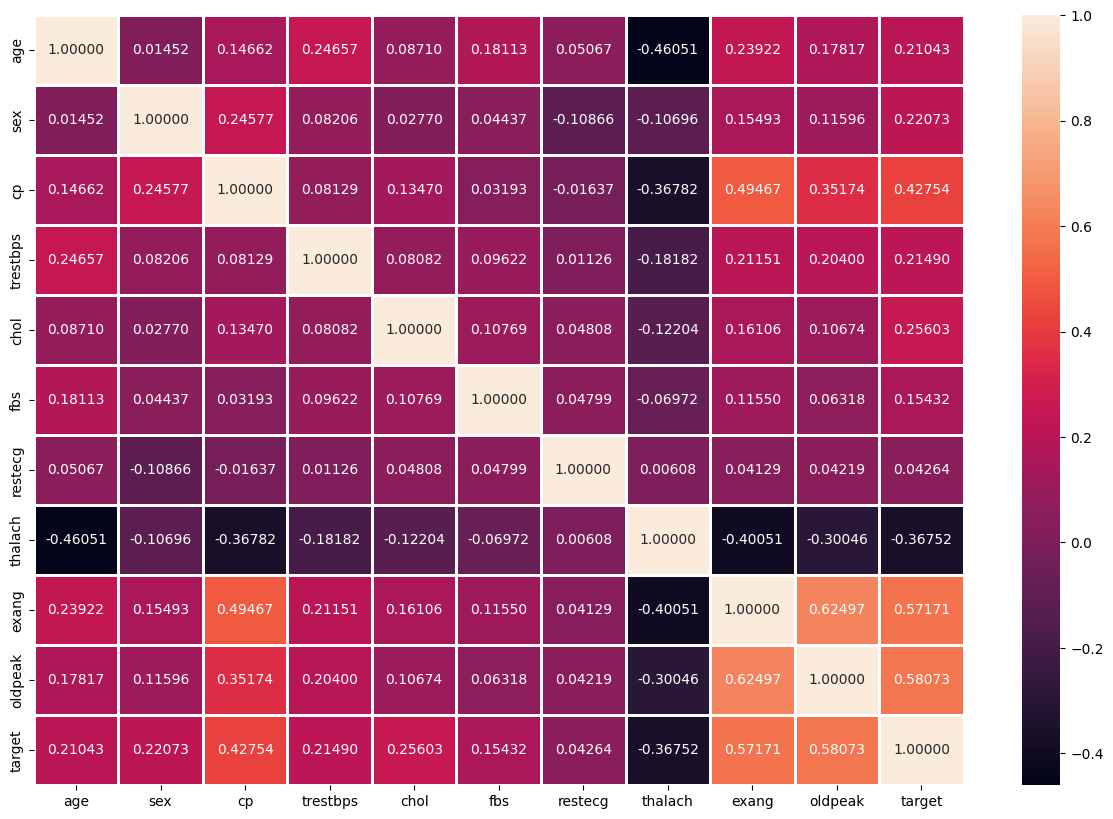

In [ ]:
# Memvisualisasikan data menggunakan Heatmap

corData = dfClean.corr()
fig, ax= plt.subplots(figsize = (15, 10))
sns.heatmap(corData, annot = True, linewidths = 1, fmt = ".5f")

# **6) Konstruksi Data**

Tahap ini bertujuan untuk menyesuaikan semua tipe data yang ada dalam dataset. Akan tetapi dikarenakan tipe data yang terdapat pada dataset ini sudah dirubah menjadi tipe data yang sama maka tidak perlu dilakukan penyesuaian tipe data

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [ ]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe dataset, maka langkah selanjutnya adalah memisahkan fitur dan target lalu simpan kedalam variabel

In [ ]:
x = dfClean.drop("target", axis = 1).values
y = dfClean.iloc[:,-1]

Setelah kita memisahkan antara fitur dan target, selanjutnya melakukan pengecekan terlebih dahulu terhadap penyebaran jumlah target terlebih dahulu

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

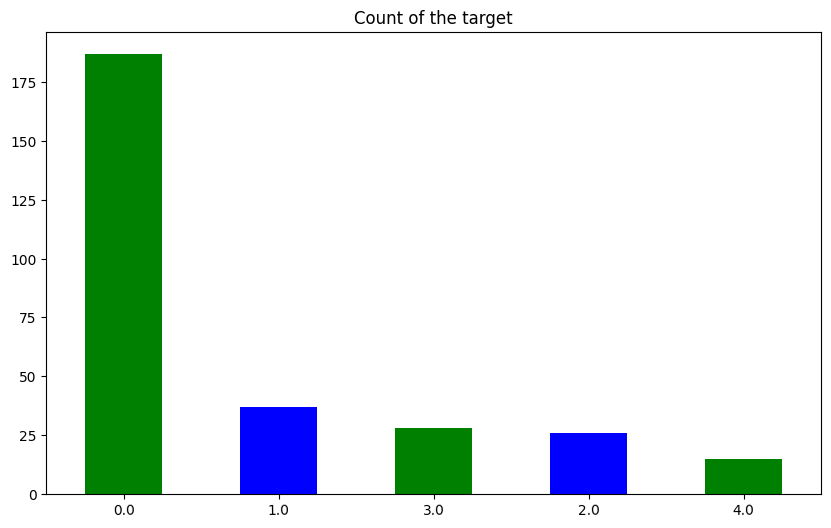

In [ ]:
dfClean['target'].value_counts().plot(kind = 'bar', figsize = (10,6), color = ['green', 'blue'])
plt.title("Count of the target")
plt.xticks(rotation = 1)

Berdasarkan grafik diatas, persebaran dari grafik bar target tidak seimbang, maka dari itu perlu adanya penyeimbangan data. Dalam menyeimbangkan target terdapat 2 cara yaitu oversampling dan undersampling. Oversampling dilakukan dengan dataset yang berjumlah sedikit, sedangkan undersampling dilakukan ketika jumlah data teralalu banyak

Pada penelitian ini oversampling dilakukan untuk menyeimbangkan data, salah satu metode Oversampling yang akan digunakan adalah SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Oversampling
smote = SMOTE(random_state = 42)
xSmote_resampled, ySmote_resampled = smote.fit_resample(x, y)

In [ ]:
plt.figure(figsize =(12, 4))
newDF1 = pd.DataFrame(data = y)

<Figure size 1200x400 with 0 Axes>

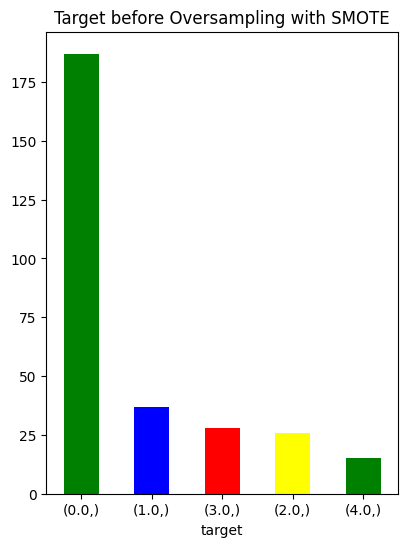

In [ ]:
plt.subplot(1, 2, 1)
newDF1.value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['green', 'blue', 'red', 'yellow'])
plt.title("Target before Oversampling with SMOTE")
plt.xticks(rotation = 0);

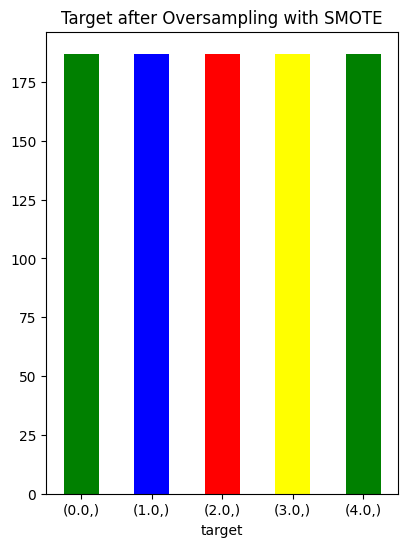

In [ ]:
plt.subplot(1, 2, 2)
newDF2 = pd.DataFrame(data = ySmote_resampled)

newDF2.value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['green', 'blue', 'red', 'yellow'])
plt.title("Target after Oversampling with SMOTE")
plt.xticks(rotation = 0);

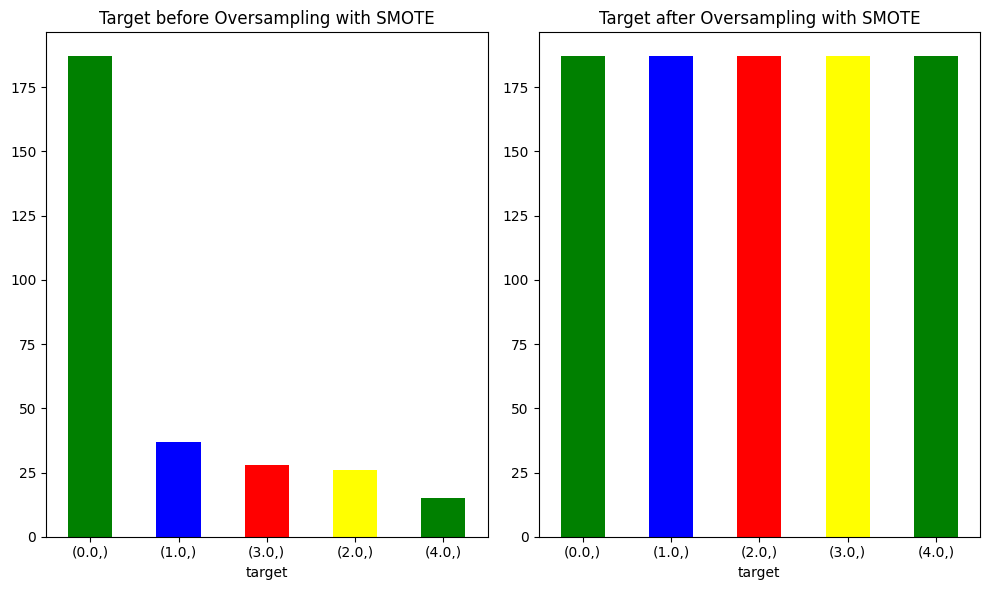

In [ ]:
plt.subplot(1, 2, 1)
newDF1.value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['green', 'blue', 'red', 'yellow'])
plt.title("Target before Oversampling with SMOTE")
plt.xticks(rotation = 0);

plt.subplot(1, 2, 2)
newDF2.value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['green', 'blue', 'red', 'yellow'])
plt.title("Target after Oversampling with SMOTE")
plt.xticks(rotation = 0);

plt.tight_layout()
plt.show()

Grafik diatas adalah komparasi dari target yang belum dilakukan oversampling dan sesudah dilakukan oversampling

In [ ]:
newDF1 = pd.DataFrame(data = y)
newDF1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
newDF2 = pd.DataFrame(data = ySmote_resampled)
newDF2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah menyeimbangkan penyebaran target, lalu perlu pengecekan apakah perlu dilakukan normalisasi/standarisasi pada dataset

In [ ]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Berdasarkan dataset tersebut, terlihat pada std (standar deviasi) setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukannya normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom / fitur

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xSmote_resampled_normal = scaler.fit_transform(xSmote_resampled)
len(xSmote_resampled_normal)

935

In [ ]:
dfCek1 = pd.DataFrame(xSmote_resampled_normal)
dfCek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya perlu membagi menjadi fitur dan target menjadi data train (latih) dan data test(uji coba)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Membagi fitur dan target menjadi data train dan test (untuk yang oversampling)
xTrain, xTest, yTrain, yTest = train_test_split(xSmote_resampled, ySmote_resampled, test_size = 0.2, random_state = 42, stratify = ySmote_resampled)

In [ ]:
# Membagi fitur dan target menjadi data train dan test (untuk yang oversampling)
xTrain_normal, xTest_normal, yTrain_normal, yTest_normal = train_test_split(xSmote_resampled_normal, ySmote_resampled, test_size = 0.2, random_state = 42, stratify = ySmote_resampled)

# **7) Model**

Tahapan ini digunakan untuk memulai modeling dataset

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

In [ ]:
def evaluation (yTest, yPred):
  accTest = accuracy_score(yTest, yPred)
  rclTest = recall_score(yTest, yPred, average = 'weighted')
  f1Test = f1_score(yTest, yPred, average = 'weighted')
  psTest = precision_score(yTest, yPred, average = 'weighted')

  metric_dict = {'accuracy Score' : round (accTest, 3),
               'recall Score' : round (rclTest, 3),
               'f1 Score' : round (f1Test, 3),
               'Precision Score' : round (psTest, 3)
               }

  return print(metric_dict)

## ***Oversampling***

### **KKN**

Tahap ini akan mulai membangun modul dengan algoritma KNN dengan nilai neighbors 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
kkn_model = KNeighborsClassifier(n_neighbors = 3)
kkn_model.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KKN

In [ ]:
yPred_kkn = kkn_model.predict(xTest)

#Evaluasi KKN Model
print("K-Nearest Neighbors (KKN) Model: ")
accuracy_kkn_smote = round(accuracy_score(yTest, yPred_kkn), 3)

print("Accuracy: ", accuracy_kkn_smote)
print("Classification Report: ")
print(classification_report(yTest, yPred_kkn))

K-Nearest Neighbors (KKN) Model: 
Accuracy:  0.754
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [ ]:
evaluation(yTest, yPred_kkn)

{'accuracy Score': 0.754, 'recall Score': 0.754, 'f1 Score': 0.741, 'Precision Score': 0.745}


Pada visualisasi sekarang ditampilkan menggunakan visualisasi confusion matrix untuk membandingkan hasil prediksi model

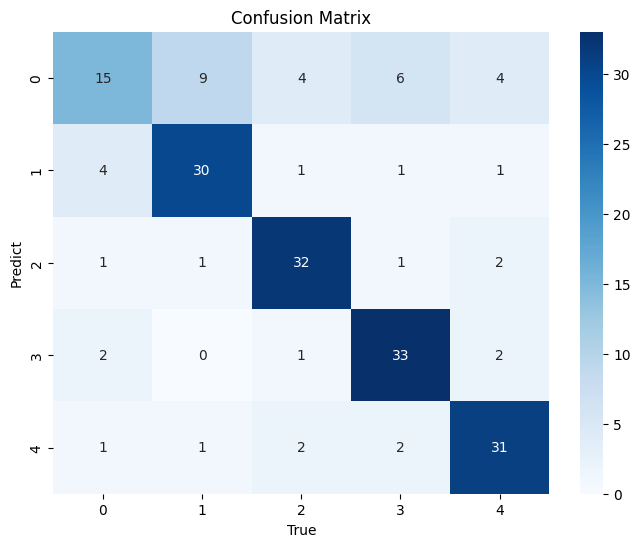

In [ ]:
confMatrix = confusion_matrix(yTest, yPred_kkn)

plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### **Random Forest**

Setelah itu langkah selanjutnya membangun model dengan algortima random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun

In [ ]:
rfModel = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfModel.fit(xTrain, yTrain)

RandomForestClassifier(random_state=42)

In [ ]:
yPred_randomForest = rfModel.predict(xTest)

#Evaluasi Random Forest
print("Random Forest Model: ")
accuracy_rf_smote = round(accuracy_score(yTest, yPred_randomForest), 3)

print("Accuracy: ", accuracy_rf_smote)
print("Classification Report: ")
print(classification_report(yTest, yPred_randomForest))

Random Forest Model: 
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(yTest, yPred_randomForest)

{'accuracy Score': 0.92, 'recall Score': 0.92, 'f1 Score': 0.92, 'Precision Score': 0.922}


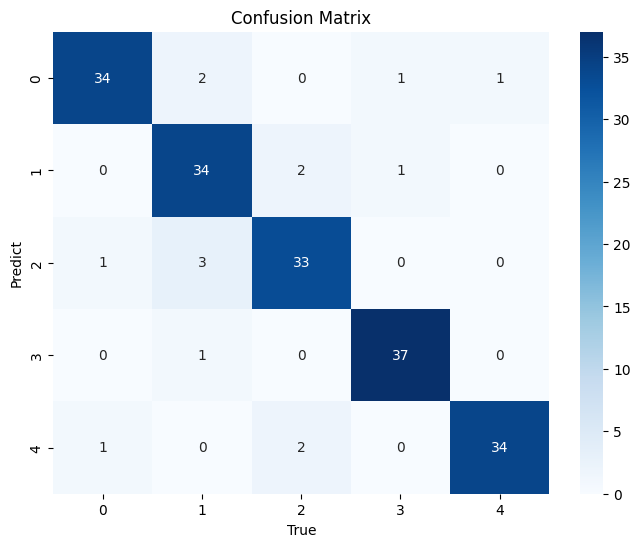

In [ ]:
confMatrix = confusion_matrix(yTest, yPred_randomForest)

#Evaluasi Confusion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### **XGBoost**

Tahap selanjutnya, membangun algoritma XGBoost dengan learning rate yaitu 0.1. Learning rate berguna untuk mengontrol sebarapa besar kita dalam menyesuaikan bobot model

In [ ]:
xgbModel = XGBClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 42)
xgbModel.fit(xTrain, yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
yPred_xgb = xgbModel.predict(xTest)

#Evaluasi Random Forest
print("XGBoost Model: ")
accuracy_xgb_smote = round(accuracy_score(yTest, yPred_xgb), 3)

print("Accuracy: ", accuracy_xgb_smote)
print("Classification Report: ")
print(classification_report(yTest, yPred_xgb))

XGBoost Model: 
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(yTest, yPred_xgb)

{'accuracy Score': 0.904, 'recall Score': 0.904, 'f1 Score': 0.904, 'Precision Score': 0.906}


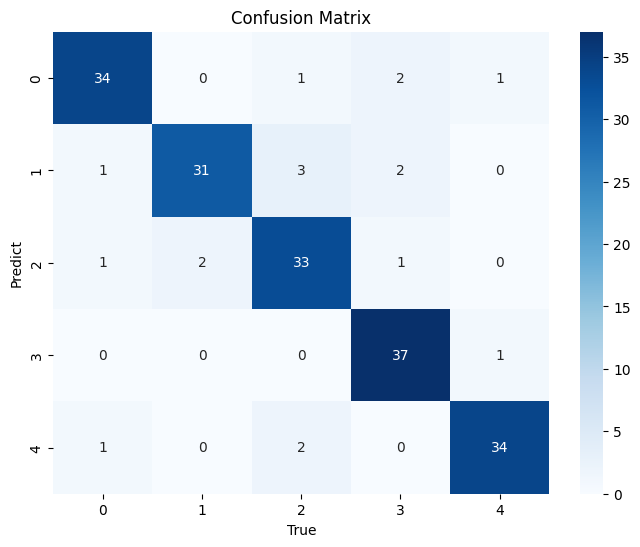

In [ ]:
confMatrix = confusion_matrix(yTest, yPred_xgb)

plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

## **Oversample + Normalisasi**

Pada bagian ini data yang sudah oversample akan dilakukan normalisasi

### **KKN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
kkn_model = KNeighborsClassifier(n_neighbors = 3)
kkn_model.fit(xTrain_normal, yTrain_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yPred_kkn = kkn_model.predict(xTest_normal)

#Evaluasi KKN Model
print("K-Nearest Neighbors (KKN) Model: ")
accuracy_kkn_smote_normal = round(accuracy_score(yTest_normal, yPred_kkn), 3)

print("Accuracy: ", accuracy_kkn_smote_normal)
print("Classification Report: ")
print(classification_report(yTest_normal, yPred_kkn))

K-Nearest Neighbors (KKN) Model: 
Accuracy:  0.861
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [ ]:
evaluation(yTest_normal, yPred_kkn)

{'accuracy Score': 0.861, 'recall Score': 0.861, 'f1 Score': 0.861, 'Precision Score': 0.863}


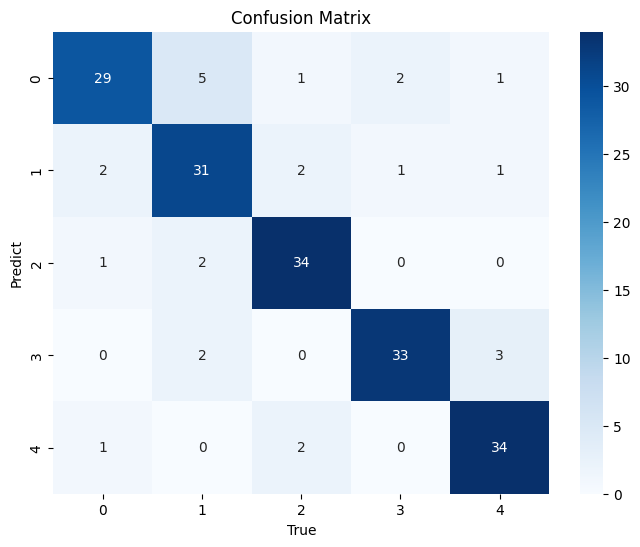

In [ ]:
confMatrix = confusion_matrix(yTest_normal, yPred_kkn)

plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### **Random Forest**

In [ ]:
rfModel = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfModel.fit(xTrain_normal, yTrain_normal)

RandomForestClassifier(random_state=42)

In [ ]:
yPred_randomForest = rfModel.predict(xTest_normal)

#Evaluasi Random Forest
print("Random Forest Model: ")
accuracy_rf_smote_normal = round(accuracy_score(yTest_normal, yPred_randomForest), 3)

print("Accuracy: ", accuracy_rf_smote_normal)
print("Classification Report: ")
print(classification_report(yTest_normal, yPred_randomForest))

Random Forest Model: 
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(yTest_normal, yPred_randomForest)

{'accuracy Score': 0.92, 'recall Score': 0.92, 'f1 Score': 0.92, 'Precision Score': 0.922}


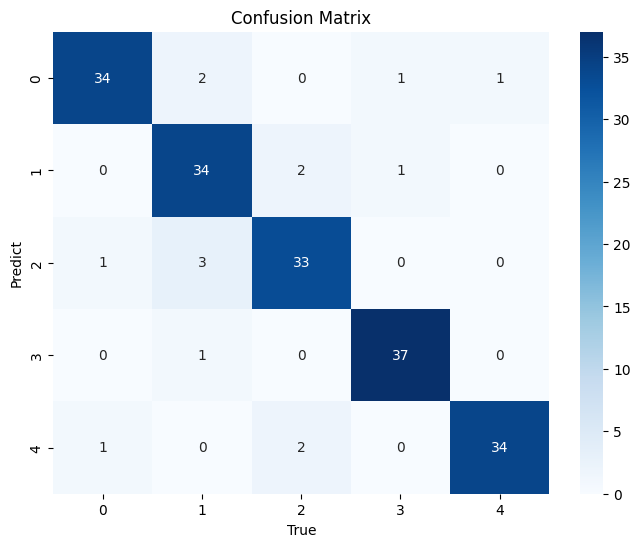

In [ ]:
confMatrix = confusion_matrix(yTest_normal, yPred_randomForest)

#Evaluasi Confusion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### **XGBoost**

In [ ]:
xgbModel = XGBClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 42)
xgbModel.fit(xTrain_normal, yTrain_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
yPred_xgb = xgbModel.predict(xTest_normal)

#Evaluasi Random Forest
print("XGBoost Model: ")
accuracy_xgb_smote_normal = round(accuracy_score(yTest_normal, yPred_xgb), 3)

print("Accuracy: ", accuracy_xgb_smote_normal)
print("Classification Report: ")
print(classification_report(yTest_normal, yPred_xgb))

XGBoost Model: 
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(yTest_normal, yPred_xgb)

{'accuracy Score': 0.904, 'recall Score': 0.904, 'f1 Score': 0.904, 'Precision Score': 0.906}


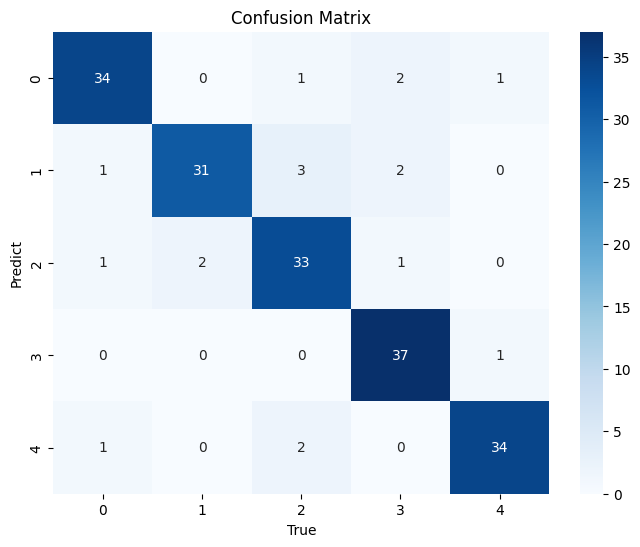

In [ ]:
confMatrix = confusion_matrix(yTest_normal, yPred_xgb)

plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

## **Tunning + Normalization + Oversampling**

Pada bagian ini model yang digunakan adalah model yang sama seperti sebelumnya, namun datanya sudah di tunning pada bagian parameter, normalisasi, oversample

### **KKN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunning tidak selalu sama karena tergantung algoritma yang digunakan

In [ ]:
kkn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

kkn_model = RandomizedSearchCV(estimator=kkn_model, param_distributions=param_grid, n_iter=100, scoring ="accuracy", cv=5)


kkn_model.fit(xTrain_normal, yTrain_normal)

best_params = kkn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 31, 'algorithm': 'kd_tree'}


In [ ]:
yPred_kkn = kkn_model.predict(xTest_normal)

#Evaluasi KKN Model
print("K-Nearest Neighbors (KKN) Model: ")
accuracy_kkn_smote_normal_Tun = round(accuracy_score(yTest_normal, yPred_kkn), 3)

print("Accuracy: ", accuracy_kkn_smote_normal_Tun)
print("Classification Report: ")
print(classification_report(yTest_normal, yPred_kkn))

K-Nearest Neighbors (KKN) Model: 
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(yTest_normal, yPred_kkn)

{'accuracy Score': 0.92, 'recall Score': 0.92, 'f1 Score': 0.92, 'Precision Score': 0.923}


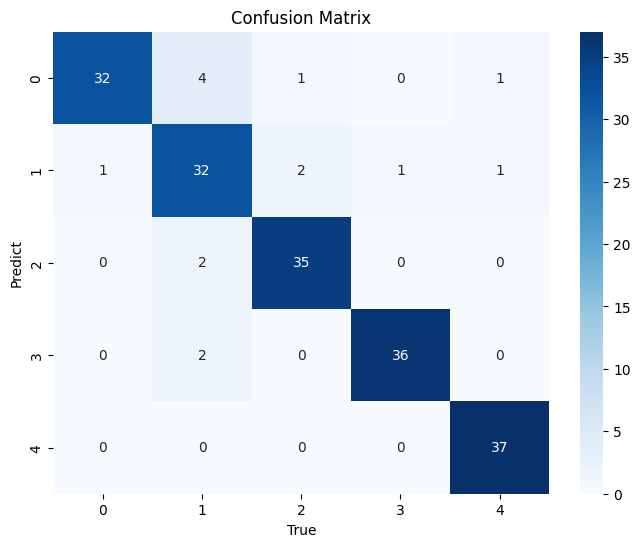

In [ ]:
confMatrix = confusion_matrix(yTest_normal, yPred_kkn)

#Evaluasi Confusion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### **Random Forest**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rfModel = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state" : [42, 100, 200]
}

rfModel = RandomizedSearchCV(rfModel, param_grid, n_iter=100, cv=5, n_jobs=-1)

rfModel.fit(xTrain_normal, yTrain_normal)

best_params = rfModel.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [ ]:
yPred_randomForest = rfModel.predict(xTest_normal)

#Evaluasi random forest tunning
print("Random Forest Model")
accuracy_rf_smote_normal_Tun = round(accuracy_score(yTest_normal, yPred_randomForest),3)
print("Accuracy: ", accuracy_rf_smote_normal_Tun)
print("Classification Report")
print(classification_report(yTest_normal, yPred_randomForest))

Random Forest Model
Accuracy:  0.93
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        38
         1.0       0.89      0.92      0.91        37
         2.0       0.87      0.89      0.88        37
         3.0       0.97      0.97      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [ ]:
evaluation(yTest_normal, yPred_randomForest)

{'accuracy Score': 0.93, 'recall Score': 0.93, 'f1 Score': 0.931, 'Precision Score': 0.931}


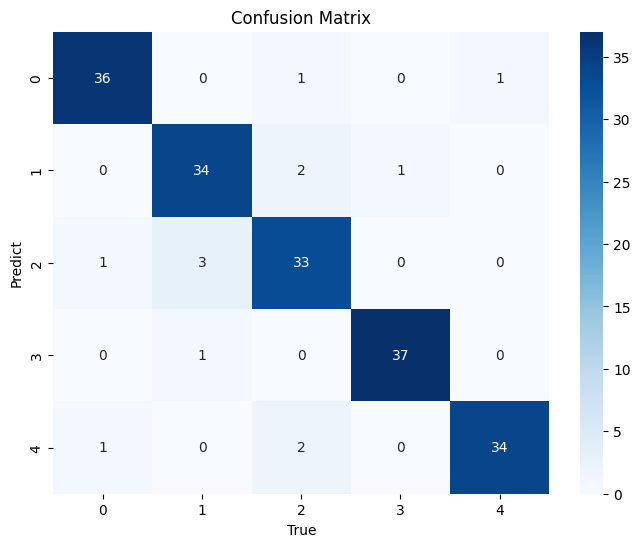

In [ ]:
confMatrix = confusion_matrix(yTest_normal, yPred_randomForest)

#Evaluasi Confusion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### **XGBOOST**

In [ ]:
xgbModel = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgbModel = RandomizedSearchCV(xgbModel, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgbModel.fit(xTrain_normal, yTrain_normal)

best_params = xgbModel.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
yPred_xgb = xgbModel.predict(xTest_normal)

#Evaluasi Random Forest
print("XGBoost Model: ")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(yTest_normal, yPred_xgb), 3)

print("Accuracy: ", accuracy_xgb_smote_normal_Tun)
print("Classification Report: ")
print(classification_report(yTest_normal, yPred_xgb))

XGBoost Model: 
Accuracy:  0.914
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.89      0.86      0.88        37
         2.0       0.89      0.84      0.86        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(yTest_normal, yPred_xgb)

{'accuracy Score': 0.914, 'recall Score': 0.914, 'f1 Score': 0.914, 'Precision Score': 0.915}


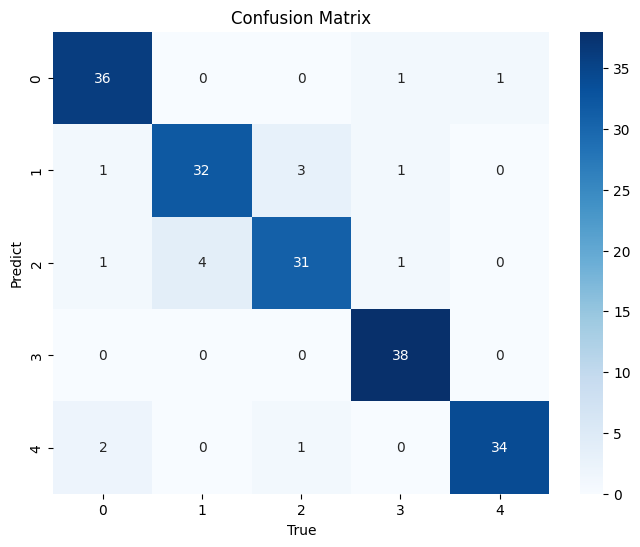

In [ ]:
confMatrix = confusion_matrix(yTest_normal, yPred_xgb)

plt.figure(figsize = (8, 6))
sns.heatmap(confMatrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

# **8) Evaluasi**

Setelah semua dilakukan modeling, maka selanjutnya adalah melakukan evaluasi dari ketiga algorithma yang sudah digunakan untuk mencari algoritma terbaik

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
modelComp1 = pd.DataFrame({'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'], 'Accuracy': [accuracy_kkn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]})

modelComp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


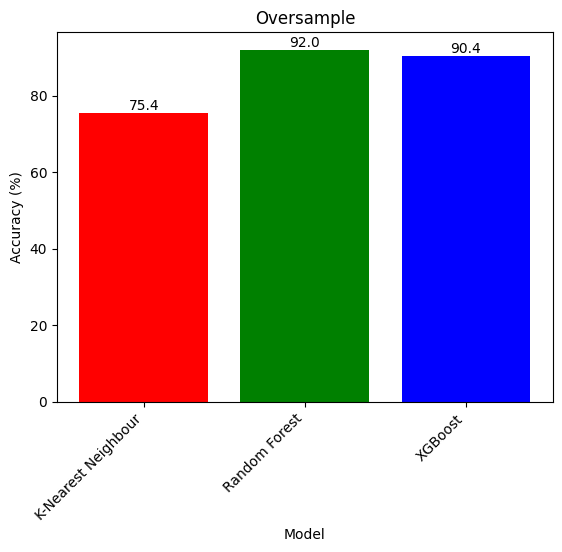

In [ ]:
#Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(modelComp1['Model'], modelComp1['Accuracy'], color = ['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation = 45, ha = 'right') #memutar label nama agar lebih mudah dibaca

# Menambahkan keterangan setiap bar mengenai nilai bar tersebut
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom')

In [ ]:
modelComp2 = pd.DataFrame({'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'], 'Accuracy': [accuracy_kkn_smote_normal*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal*100]})

modelComp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


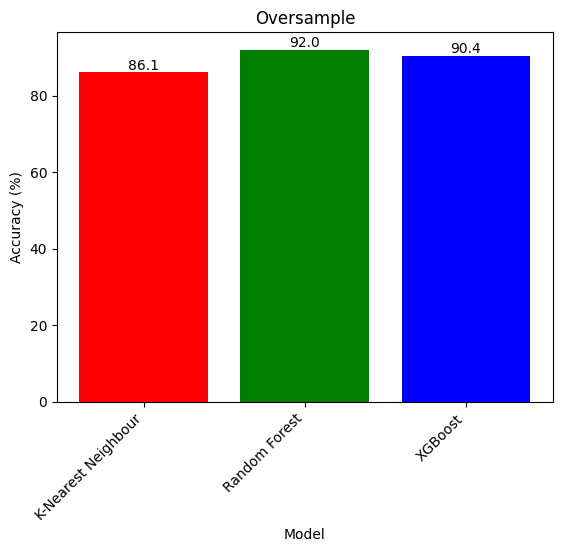

In [ ]:
#Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(modelComp2['Model'], modelComp2['Accuracy'], color = ['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation = 45, ha = 'right') #memutar label nama agar lebih mudah dibaca

# Menambahkan keterangan setiap bar mengenai nilai bar tersebut
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom')

In [ ]:
modelComp3 = pd.DataFrame({'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'], 'Accuracy': [accuracy_kkn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100, accuracy_xgb_smote_normal_Tun*100]})

modelComp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,93.0
2,XGBoost,91.4


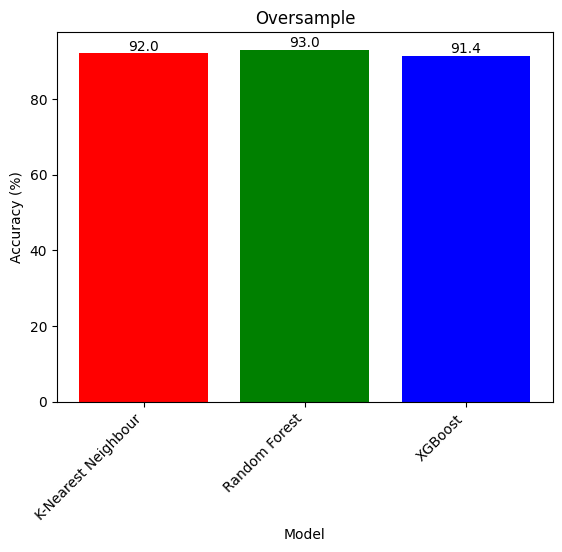

In [ ]:
#Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(modelComp3['Model'], modelComp3['Accuracy'], color = ['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation = 45, ha = 'right') #memutar label nama agar lebih mudah dibaca

# Menambahkan keterangan setiap bar mengenai nilai bar tersebut
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom')

In [ ]:
#Data Frame
modelCompBest = pd.DataFrame ({
    'Model': ['K-Nearest Neigbor Oversample Tuning', 'Random Forest Oversample Normalisasi Tuning', 'XGBoost Oversample Normalisasi Tuning'],
    'Accuracy': [accuracy_kkn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100, accuracy_xgb_smote_normal_Tun*100]
})

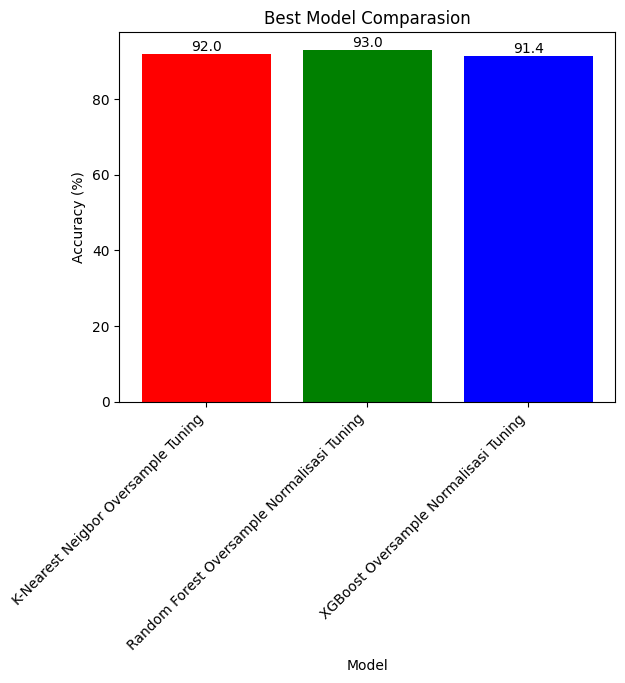

In [ ]:
#Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(modelCompBest['Model'], modelCompBest['Accuracy'], color = ['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparasion')
plt.xticks(rotation = 45, ha = 'right') #memutar label nama agar lebih mudah dibaca

# Menambahkan keterangan setiap bar mengenai nilai bar tersebut
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom')